In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds, eigsh
from skimage import io, color

img = io.imread("town_grayscale.jpg")
gray = color.rgb2gray(img)
A = np.array(gray)

/home/sel68/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def svd_(A, k = None, tol = 1e-10):
    m, n = A.shape

    ATA = A.T @ A
    eigvals, V = np.linalg.eigh(ATA)

    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    V = V[:, idx]

    sing_vals = np.sqrt(np.clip(eigvals, 0, None))

    if k is not None:
        sing_vals = sing_vals[:k]
        V = V[:, :k]

    U = np.zeros((m, len(sing_vals)))
    for i in range(len(sing_vals)):
        if sing_vals[i] > tol:
            U[:, i] = (A @ V[:, i])/ sing_vals[i]
    
    Sigma = np.diag(sing_vals)

    return U, Sigma, V.T  

In [9]:
def fast_svd(A, k=None, tol=1e-10):
    m, n = A.shape
    if k is None:
        k = min(m, n)

    ATA = A.T @ A
    
    # Only compute top-k eigenpairs
    eigvals, V = eigsh(ATA, k=k, which="LM")
    
    # Sort in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    V = V[:, idx]
    
    sing_vals = np.sqrt(np.clip(eigvals, 0, None))
    
    U = np.zeros((m, len(sing_vals)))
    for i in range(len(sing_vals)):
        if sing_vals[i] > tol:
            U[:, i] = (A @ V[:, i]) / sing_vals[i]
    
    return U, sing_vals, V.T

In [14]:
k = 50
U, s, Vt = fast_svd(A, k=k)

s = s[::-1]
U = U[:, ::-1]
Vt = Vt[::-1, :]



In [15]:
Sigma = np.diag(s)
A_k = U  @ Sigma @ Vt

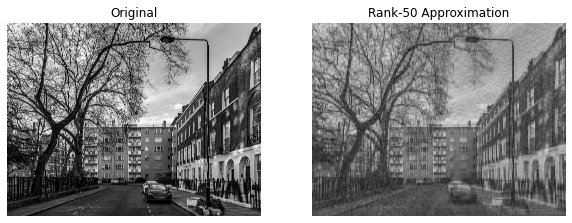

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(A, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(A_k, cmap='gray')
axes[1].set_title(f"Rank-{k} Approximation")
for ax in axes: ax.axis('off')
plt.show()

In [17]:
m, n = A.shape
orig_size = m * n
compressed_size = k * (m + n + 1)
print("Compression ratio:", orig_size / compressed_size)

Compression ratio: 65.04824594492645
